<a href="https://colab.research.google.com/github/hsching/Airline-Passenger-Satisfaction-Predictive-Models/blob/main/4_Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import file from the folder "ISOM3360" in our MyDrive, with shortcut of shared folder "ISOM3360 group project" in
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# all standard scaler

In [ ]:
file_name = 'train_processed (all standardization).csv'
loc = ''
# loc = '/content/drive/MyDrive/ISOM3360/ISOM3360 group project/Cathy_Data preparation, Decision tree/'
train = pd.read_csv(loc+file_name,index_col=0)
train_df = train.copy()
train_df

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Flight Distance_binned_long,Flight Distance_binned_middle,Flight Distance_binned_short,satisfaction_satisfied
id,,,,,,,,,,,,,,,,,,,,,
70172,-1.745279,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,0.479403,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5047,-0.951360,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
110028,-0.885200,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,0.479403,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
24026,-0.951360,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
119299,1.430397,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,-0.296785,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,-1.083680,-0.549533,-1.350954,-0.541060,0.018094,-0.904178,-0.926545,-1.091211,-1.018885,-0.296785,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
73097,0.636478,0.956691,0.616172,0.888612,0.800803,-0.904178,0.555482,1.183099,1.231704,1.255590,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
68825,-0.620561,-1.302646,-1.350954,-1.255895,0.018094,0.600117,-1.667559,1.183099,0.481508,-0.296785,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X = train_df.iloc[:,0:26]  #features
y = train_df['satisfaction_satisfied']  #target label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

def run():
  model_tunning = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=440, random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_test = model_tunning.predict(X_test)
  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)

  tree_fpr, tree_tpr, thresholds = roc_curve(y, y_pred_cv)
  tree_auc = auc(tree_fpr, tree_tpr)

  cm = confusion_matrix(y, y_pred_cv)

  print('Simple Accuracy:', accuracy_score(y_test, y_pred_test))
  print('CV Accuracy:', accuracy_score(y, y_pred_cv))
  print('CV AUC:', tree_auc)
  print('Tree object node count:', model_tunning.tree_.node_count)
  print('CV Confusion matrix:\n', cm)
  print('FPR:', cm[0][1] / (cm[0][1] + cm[1][1]))

In [ ]:
run()

Simple Accuracy: 0.959241614936721
CV Accuracy: 0.9592027255928549
CV AUC: 0.9562811794851692
Tree object node count: 879
Confusion matrix:
 [[57595  1284]
 [ 2955 42070]]
FPR: 0.02961664436960834


# Features Selection

## Removing features with low variance

In [ ]:
train_df.describe()

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Flight Distance_binned_long,Flight Distance_binned_middle,Flight Distance_binned_short,satisfaction_satisfied
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,1.046283e-17,5.128841e-17,-1.615927e-16,1.364955e-16,1.094153e-18,1.717136e-16,-1.805352e-17,-5.450248e-17,-5.946036e-17,1.813558e-16,...,0.492541,0.182678,0.310373,0.477989,0.449886,0.072124,0.053954,0.207509,0.738537,0.433333
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,0.499947,0.386404,0.462649,0.499518,0.497485,0.258695,0.225927,0.405525,0.439433,0.495538
min,-2.142239e+00,-2.055758e+00,-2.006662e+00,-1.970731e+00,-2.330031e+00,-2.408473e+00,-2.408573e+00,-2.607418e+00,-2.519278e+00,-2.625348e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.190404e-01,-5.495334e-01,-6.952452e-01,-5.410596e-01,-7.646142e-01,-9.041783e-01,-9.265454e-01,-1.091211e+00,-1.018885e+00,-1.072973e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.103858e-02,2.035790e-01,-3.953663e-02,1.737761e-01,1.809426e-02,-1.520308e-01,-1.855316e-01,4.249958e-01,4.815079e-01,4.794026e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.687977e-01,9.566913e-01,6.161719e-01,8.886119e-01,8.008027e-01,6.001168e-01,5.554822e-01,1.183099e+00,4.815079e-01,4.794026e-01,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.018235e+00,1.709804e+00,1.271880e+00,1.603448e+00,1.583511e+00,1.352264e+00,1.296496e+00,1.183099e+00,1.231704e+00,1.255590e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(train_df.var(),'\n')
train_df.var().describe()

Age                                  1.000010
Inflight wifi service                1.000010
Departure/Arrival time convenient    1.000010
Ease of Online booking               1.000010
Gate location                        1.000010
Food and drink                       1.000010
Online boarding                      1.000010
Seat comfort                         1.000010
Inflight entertainment               1.000010
On-board service                     1.000010
Leg room service                     1.000010
Baggage handling                     1.000010
Checkin service                      1.000010
Inflight service                     1.000010
Cleanliness                          1.000010
Departure Delay in Minutes           1.000010
Arrival Delay in Minutes             1.000010
Gender_Male                          0.249947
Customer Type_disloyal Customer      0.149308
Type of Travel_Personal Travel       0.214044
Class_Business                       0.249518
Class_Eco                         

count    27.000000
mean      0.697465
std       0.404389
min       0.051043
25%       0.246524
50%       1.000010
75%       1.000010
max       1.000010
dtype: float64

In [ ]:
from sklearn.feature_selection import VarianceThreshold
def var_feature_sel(var_threshold):
  sel = VarianceThreshold(threshold = var_threshold)
  sel.fit_transform(train_df)
  sel.get_support() # a list of True/False
  return train_df.columns[sel.get_support()]

In [ ]:
print(len(var_feature_sel(0.9)))
var_feature_sel(0.9)

17


Index(['Age', 'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
print(len(var_feature_sel(1)))
var_feature_sel(1)

10


Index(['Age', 'Inflight wifi service', 'Gate location', 'Online boarding',
       'Inflight entertainment', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
# new datasets with selected features
train_df_var_10 = train_df[var_feature_sel(1)]
train_df_var_17 = train_df[var_feature_sel(0.9)]

In [ ]:
X = train_df_var_10  #features
y = train_df['satisfaction_satisfied']  #target label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
run()

Simple Accuracy: 0.9187238342716905
CV Accuracy: 0.9188674160763782
CV AUC: 0.9155829242363708
Tree object node count: 879
Confusion matrix:
 [[55359  3520]
 [ 4910 40115]]
FPR: 0.0806691875787785


In [ ]:
X = train_df_var_17  #features
y = train_df['satisfaction_satisfied']  #target label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
run()

Simple Accuracy: 0.9348443289543333
CV Accuracy: 0.9348629504157684
CV AUC: 0.9309900251014985
Tree object node count: 879
Confusion matrix:
 [[56526  2353]
 [ 4415 40610]]
FPR: 0.05476805623443428


## Univariate feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
def selectkbest(k):
  X = train_df.iloc[:,0:26]  #features
  y = train_df['satisfaction_satisfied']  #target label
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

  sel_best = SelectKBest(f_classif, k=k)
  sel_best.fit_transform(X, y)
  sel_best.get_support()
  return train_df.iloc[:,:26].columns[sel_best.get_support()]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
ls = []
for i in range(27):
  sel_best = SelectKBest(f_classif, k=i)
  sel_best.fit_transform(X, y)
  sel_best.get_support()
  for t in train_df.iloc[:,:26].columns[sel_best.get_support()]:
    if t not in ls:
      ls.append(t)
ls

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


['Class_Business',
 'Online boarding',
 'Class_Eco',
 'Type of Travel_Personal Travel',
 'Inflight entertainment',
 'Seat comfort',
 'On-board service',
 'Leg room service',
 'Cleanliness',
 'Flight Distance_binned_short',
 'Inflight wifi service',
 'Baggage handling',
 'Inflight service',
 'Checkin service',
 'Flight Distance_binned_middle',
 'Food and drink',
 'Customer Type_disloyal Customer',
 'Ease of Online booking',
 'Flight Distance_binned_long',
 'Age',
 'Class_Eco Plus',
 'Arrival Delay in Minutes',
 'Departure/Arrival time convenient',
 'Departure Delay in Minutes',
 'Gender_Male',
 'Gate location']

In [ ]:
n = range(10, 20)
cv_acc = []

for i in n:
  X = train_df[selectkbest(i)]  #features
  y = train_df['satisfaction_satisfied']  #target label
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
  
  model_tunning = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=440, random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)
  cv_acc.append(accuracy_score(y, y_pred_cv))

print('Best n for number of features:', n[cv_acc.index(max(cv_acc))], '(cv accuracy =', max(cv_acc), ')')

Best n for number of features: 17 (cv accuracy = 0.9582980443486295 )


In [ ]:
X = train_df[selectkbest(17)]  #features
y = train_df['satisfaction_satisfied']  #target label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
run()

Simple Accuracy: 0.957292719310909
CV Accuracy: 0.9582980443486295
CV AUC: 0.9550779250369567
Tree object node count: 879
Confusion matrix:
 [[57656  1223]
 [ 3110 41915]]
FPR: 0.028350873939450138


## Recursive feature elimination

In [ ]:
X = train_df.iloc[:,0:26]  #features
y = train_df['satisfaction_satisfied']  #target label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# test model
y_pred = model.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))

Accuracy score: 0.9454549829170877


In [ ]:
len(train_df.columns)

27

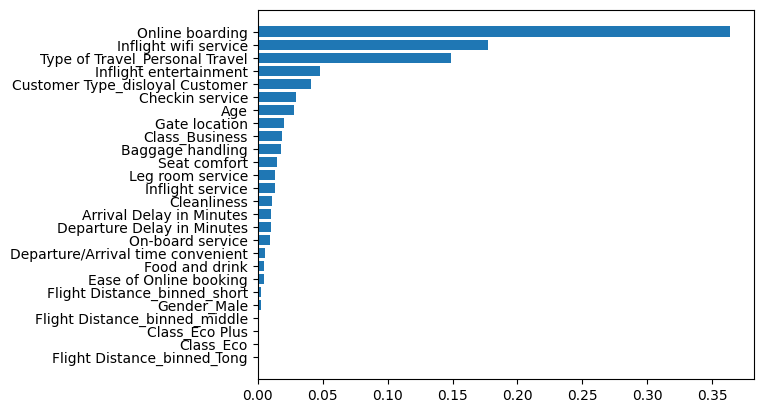

In [ ]:
f_i = list(zip(train_df.columns, model.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [ ]:
def rfe(k):
  X = train_df.iloc[:,0:26]  #features
  y = train_df['satisfaction_satisfied']  #target label
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

  model = DecisionTreeClassifier(random_state=42)
  model.fit(X_train, y_train)
  f_i = list(zip(train_df.columns, model.feature_importances_))
  f_i.sort(key = lambda x : x[1], reverse=True)
  f_k = [f_i[i][0] for i in range(k)]
  return f_k

In [ ]:
model.feature_importances_

array([0.02766251, 0.17726932, 0.00556886, 0.00476826, 0.02029665,
       0.00487805, 0.36352008, 0.01509159, 0.04770189, 0.00942153,
       0.01359945, 0.01803802, 0.02978305, 0.0133965 , 0.01106076,
       0.01003016, 0.01021186, 0.00240283, 0.04114176, 0.14864845,
       0.01899995, 0.00099063, 0.00111475, 0.00041524, 0.00143294,
       0.00255493])

In [ ]:
n = range(10, 20)
cv_acc = []

for i in n:
  X = train_df[rfe(i)]  #features
  y = train_df['satisfaction_satisfied']  #target label
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
  
  model_tunning = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=440, random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)
  cv_acc.append(accuracy_score(y, y_pred_cv))

print('Best n for number of features:', n[cv_acc.index(max(cv_acc))], '(cv accuracy =', max(cv_acc), ')')

Best n for number of features: 14 (cv accuracy = 0.959857175854635 )


In [ ]:
X = train_df[rfe(14)]  #features
y = train_df['satisfaction_satisfied']  #target label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
run()

Simple Accuracy: 0.9598190654925172
CV Accuracy: 0.959857175854635
CV AUC: 0.9567436651601783
Tree object node count: 879
Confusion matrix:
 [[57707  1172]
 [ 2999 42026]]
FPR: 0.027130885689152274


## Feature selection using SelectFromModel (tree-based)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

X = train_df.iloc[:,0:26]  #features
y = train_df['satisfaction_satisfied']  #target label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
clf.feature_importances_

array([0.02226898, 0.14074457, 0.01809379, 0.0365893 , 0.01838358,
       0.01290605, 0.12464581, 0.04604576, 0.05299471, 0.0326404 ,
       0.03077389, 0.03398879, 0.03035348, 0.02650153, 0.02581269,
       0.01137922, 0.01170498, 0.00733958, 0.04661074, 0.1045907 ,
       0.07583858, 0.06333713, 0.00536185, 0.00139678, 0.00597576,
       0.01372135])

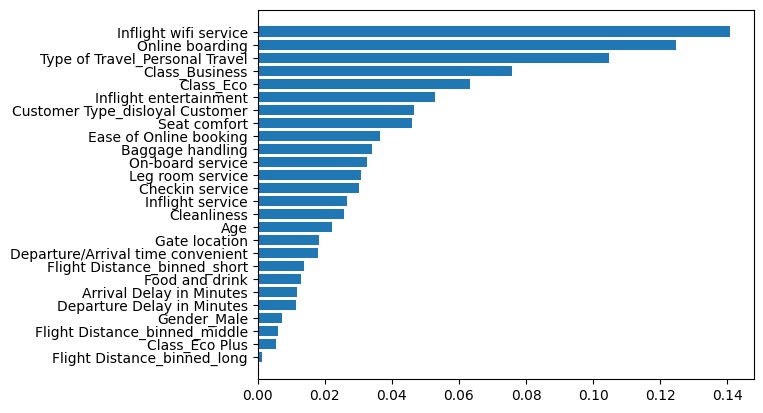

In [ ]:
f_i = list(zip(train_df.columns, clf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [ ]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)

def selectfrommodel(k):
  f_i = list(zip(train_df.columns, clf.feature_importances_))
  f_i.sort(key = lambda x : x[1], reverse=True)
  f_k = [f_i[i][0] for i in range(k)]
  return f_k

In [ ]:
n = range(10, 20)
cv_acc = []

for i in n:
  X = train_df[selectfrommodel(i)]  #features
  y = train_df['satisfaction_satisfied']  #target label
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
  
  model_tunning = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=440, random_state=42)
  model_tunning.fit(X_train, y_train)

  y_pred_cv = cross_val_predict(model_tunning, X, y, cv=5)
  cv_acc.append(accuracy_score(y, y_pred_cv))

print('Best n for number of features:', n[cv_acc.index(max(cv_acc))], '(cv accuracy =', max(cv_acc), ')')

Best n for number of features: 19 (cv accuracy = 0.960232522328303 )


In [ ]:
X = train_df[selectfrommodel(19)]  #features
y = train_df['satisfaction_satisfied']  #target label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
run()

Simple Accuracy: 0.9604927578076127
CV Accuracy: 0.960232522328303
CV AUC: 0.9574093104050743
Tree object node count: 879
Confusion matrix:
 [[57618  1261]
 [ 2871 42154]]
FPR: 0.02904526085454336


In [ ]:
# save new train set
train_df_selectfrommodel_19 = train_df[selectfrommodel(19)]
train_df_selectfrommodel_19['satisfaction_satisfied'] = train_df['satisfaction_satisfied']
file_name = 'train_selectfrommodel_top19.csv'
loc = ''
# loc = '/content/drive/MyDrive/ISOM3360/ISOM3360 group project/Cathy_Data preparation, Decision tree/'
train_df_selectfrommodel_19.to_csv(loc + file_name)

<ipython-input-159-60b54f20d8b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_selectfrommodel_19['satisfaction_satisfied'] = train_df['satisfaction_satisfied']


In [ ]:
# save new test set
file_name = 'test_processed (all standardization).csv'
loc = ''
# loc = '/content/drive/MyDrive/ISOM3360/ISOM3360 group project/Cathy_Data preparation, Decision tree/'
test = pd.read_csv(loc+file_name)
test_df = test.copy()

test_df_selectfrommodel_19 = test_df[selectfrommodel(19)]
test_df_selectfrommodel_19['satisfaction_satisfied'] = test_df['satisfaction_satisfied']
file_name = 'test_selectfrommodel_top19.csv'
train_df_selectfrommodel_19.to_csv(loc + file_name)

<ipython-input-161-daf887cb3426>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_selectfrommodel_19['satisfaction_satisfied'] = test_df['satisfaction_satisfied']


## Overall top 5

In [ ]:
X = train_df[['Inflight wifi service', 'Online boarding', 'Type of Travel_Personal Travel', 'Class_Business', 'Inflight entertainment']]  #features
y = train_df['satisfaction_satisfied']  #target label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
run()

Simple Accuracy: 0.9269043838121361
CV Accuracy: 0.9263358484755159
CV AUC: 0.9229957892073128
Tree object node count: 553
Confusion matrix:
 [[55820  3059]
 [ 4595 40430]]
FPR: 0.07033962611235026


## Sequential Feature Selection¶